# Kalorimetrie Laborversuch

Author: Tahsin Ahmad

Datum: 23.11.23

Gruppe: 29

## Forschungsfrage
Welche der drei Proben Messing, Edelstahl und Kunststoff hat die höchste spezifische wärme Kapazität?

## Versuchsaufbau und Durchführung
Der Sous-Vide-Garer ist auf 80 Grad Celsius eingestellt, der Versuch wurde bereits an der Edelstahlprobe durchgeführt, nun verbleiben die Kunststoff- und Messingproben im Sous-Vide-Garer. Ein Sensor erfasst die Temperaturwerte des Sous-Vide-Garers, ein anderer die Temperaturwerte der Umgebung, drei der Sensoren befinden sich im Kalorimeter. Ein Gruppenmitglied bereitet den Aufbau für die Durchführung des Experiments für die zweite Probe auf, in unserem Fall Messing.

<img src="figures/img2.22.38_6f1a93b4.jpg" width="800">

<img src="figures/img1.22.38_5deae812.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib
import json
from typing import Dict
from functions import m_json
from functions import utility
# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")

### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
datafile_path_const = 'data/constant/setup_constant.h5'
group_path_const = '/RawData'
setup_file_path_const = "data/constant/setup_constant.json"
metadata_path_const = "data/constant/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path_const)

# getting temperature data
temperature_data = data_dict['temperature']
# getting timestamp data
timestamp_data = data_dict['timestamp']
# getting names of the sensors
sensor_names_const = data_dict['name']

calorimeter_data_const = temperature_data[0:3, :] # assuming that the calorimeter sensors are the first three
env_data_const = temperature_data[3, :] # assuming that the environment sensor is the last one
calorimeter_timestamp_const = timestamp_data[0:3, :] # timestamp with same assumption
env_timestamp_const = timestamp_data[3, :] # timestamp with same assumption

# I will later test this assumption in the below cell by getting the actual indexes!
# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
with open(setup_file_path_const, "r") as file:  # reading the setup file
    setup_data = json.load(file)
    
# index lists for each sensor 
index_calorimeter = []
index_environment = []
# starting index
counter = 1

# getting indexes from setup files
for sensor_id, sensor_info in setup_data["setup"].items():
    if sensor_info["type"] == "sensor":
        # getting sensor type and giving it a relevant index
        if "calorimeter" in sensor_info["name"]:
            index_calorimeter.append(counter)
        elif "environment" in sensor_info["name"]:
            index_environment.append(counter)
        counter += 1

# Printing the indexes
print("Calorimeter Indexes:", index_calorimeter)
print("Environment Indexes:", index_environment)
# As you can see the assumption was correct, the first three sensors are the calorimeter sensors
# It was also tested by intalling H5WEB extension in VSC the result was identical 

Calorimeter Indexes: [1, 2, 3]
Environment Indexes: [4]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
mean_std_calorimeter_const = utility.cal_mean_and_standard_deviation(calorimeter_data_const)
mean_std_environment_const = utility.cal_mean_and_standard_deviation(env_data_const)

# Printing the results
print("Mean and Standard Deviation for Calorimeter Sensors for the constant:")
print() # better readable
print(mean_std_calorimeter_const)

print("\nMean and Standard Deviation for Environment Sensors for the constant:")
print () # better readable
print(mean_std_environment_const)
# DONE #

Mean and Standard Deviation for Calorimeter Sensors for the constant:

[[21.29166667 21.3125     21.33333333 21.35416667 21.35416667 21.375
  21.375      21.375      21.35416667 21.375      21.39583333 21.375
  21.375      21.39583333 21.45833333 21.5        21.58333333 21.625
  21.72916667 21.79166667 21.85416667 21.9375     22.02083333 22.125
  22.1875     22.25       22.35416667 22.41666667 22.5        22.5625
  22.64583333 22.72916667 22.8125     22.875      22.95833333 22.97916667
  23.125      23.1875     23.25       23.375      23.4375     23.5
  23.58333333 23.6875     23.75       23.8125     23.875      23.95833333
  24.0625     24.125      24.1875     24.3125     24.35416667 24.4375
  24.5        24.5625     24.66666667 24.72916667 24.8125     24.89583333
  24.95833333 25.0625     25.125      25.1875     25.27083333 25.35416667
  25.4375     25.5        25.5625     25.64583333 25.6875     25.6875
  25.72916667 25.77083333 25.79166667 25.77083333 25.77083333]
 [ 0.05892557  0.

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


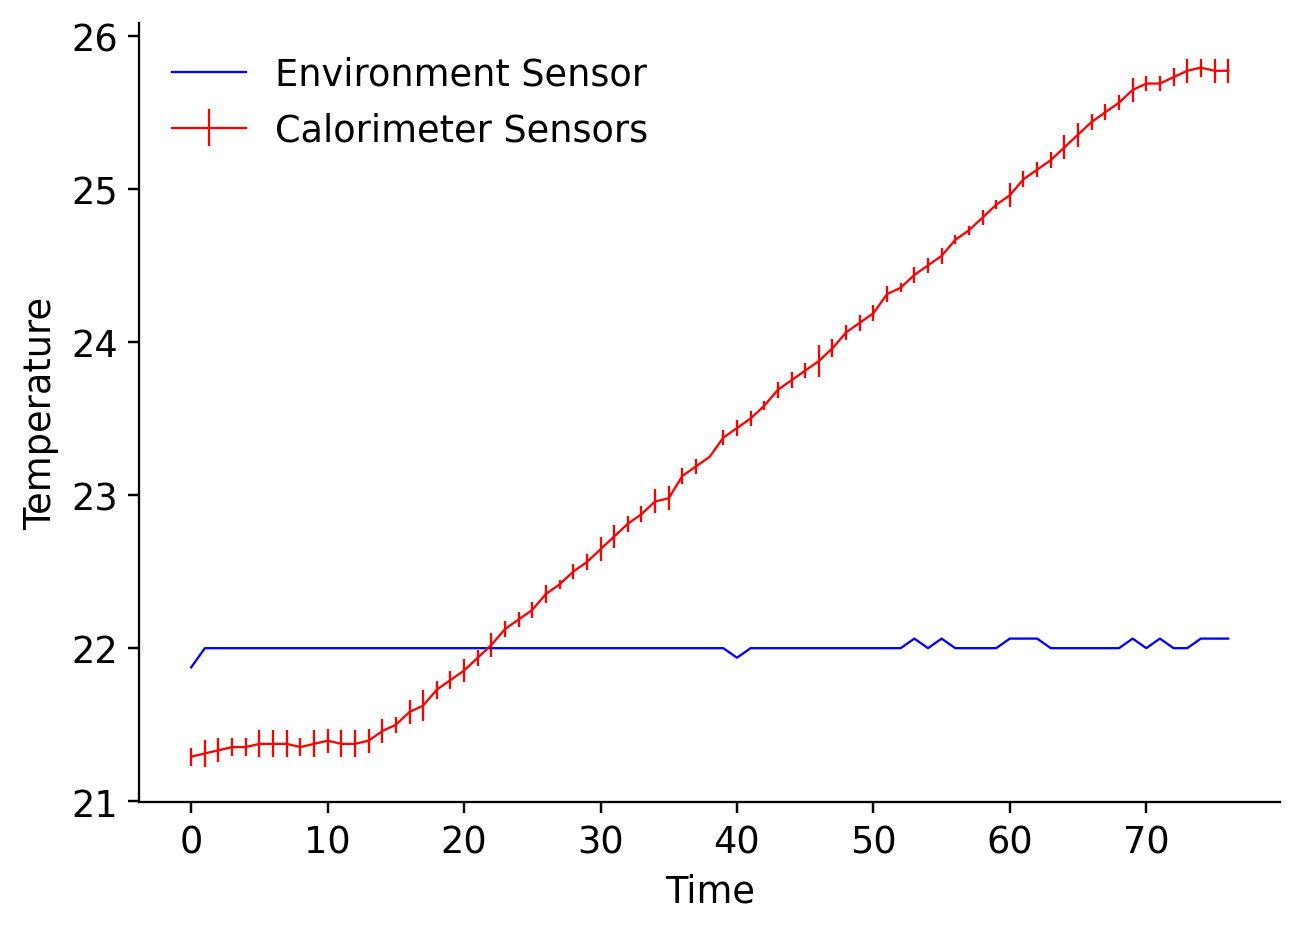

In [6]:
# TODO: Use the temperature and time data for plotting
mean_values_const = mean_std_calorimeter_const[0] # first dimension is the mean data
std_dev_values_const = mean_std_calorimeter_const[1] # secont dimenstion is the standard deviation data

# this will be only one point in the graph so i will plot the environment data instead
'''
mean_values_environment_const = mean_std_environment_const[0]
std_dev_values_environment_const = mean_std_environment_const[1]
''' 

# getting plots
plt.errorbar(range(len(mean_values_const)), mean_values_const, yerr=std_dev_values_const, fmt='r-', label='Calorimeter Sensors')
plt.plot(env_data_const,'b-',label='Environment Sensor')

# labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18
# TODO: Read mass of the water from the metadata of the experiment.
# Reading the metadata
with open(metadata_path_const, "r") as file:
    metadata = json.load(file)

# getting water mass value from the metadata
water_mass = metadata["calorimeter"]["medium"]["mass"]["value"]

# Printing the result
print("Water Mass:", water_mass, "grams")
# DONE #

Water Mass: 400 grams


In [8]:
# TODO: Reading heater related data from hdf5 file
dataset_names = ["current", "heat_time", "voltage"]
with h5.File(datafile_path_const, "r") as file:
    # Iterating through the dataset 
    for dataset_name in dataset_names:
        dataset_path = f"RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/{dataset_name}"
        
        # Checking if the dataset exists, sacalar or array
        if dataset_path in file:
            if isinstance(file[dataset_path], h5.Dataset):
                globals()[dataset_name] = file[dataset_path][()]
            
# Print
print("Current:", current,"amperes")
print("Heat Time:", heat_time,"seconds")
print("Voltage:", voltage,"volts")
# DONE #

Current: 3.9 amperes
Heat Time: 182.0 seconds
Voltage: 11.8 volts


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_end_const, temperature_start_const = utility.get_start_end_temperature(mean_values_const)
print("Ending Temperature:", temperature_end_const,"celsius")
print()
print("Starting Temperature:", temperature_start_const,"celsius")
# DONE #

Ending Temperature: 25.731770833333332 celsius

Starting Temperature: 21.375 celsius


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter
U = voltage  # voltage value
I = current   # current value
delta_t = heat_time  #time difference value
T2 = temperature_end_const  # ending temperature value
T1 = temperature_start_const  # starting temperature value

# Calculating calorimeter constant
calorimeter_const = (U * I * delta_t) / (T2 - T1)
# DONE #

#### (Vii) Ergebnis

In [11]:
print("Calorimeter Constant:", calorimeter_const,"J/°C")#in J/°C

Calorimeter Constant: 1922.4421757322184 J/°C


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
datafile_path_prob1 = 'data/Edelstahl/Stahl.h5'
group_path_prob1 = '/RawData'
setup_file_path_prob1 = "data/Edelstahl/setup_PDC005.json"
metadata_path_prob1 = "data/Edelstahl/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
# DONE #

In [13]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, group_path_prob1)
# temperature data
temperature_data_prob1 = data_dict['temperature']
# timestamp data
timestamp_data_prob1 = data_dict['timestamp']
# names
sensor_names_prob1 = data_dict['name']

# getting data, based on assumption that the calorimeter sensors are the first 3
# evironment sensor is the 4 and last one is the bath sensor
# These assumptions will be tested in the cell below.
calorimeter_data_prob1 = temperature_data_prob1[0:3, :]
env_data_prob1 = temperature_data_prob1[3, :]
bath_data_prob1 = temperature_data_prob1[4, :]

# doing same for the timestamp
calorimeter_timestamp_prob1 = timestamp_data_prob1[0:3, :]
env_timestamp_prob1 = timestamp_data_prob1[3, :]
bath_timestamp_prob1 = timestamp_data_prob1[4, :]

# Printing the values 
print("Calorimeter Data:")
print()
print(calorimeter_data_prob1)

print("\nEnvironment Data:")
print()
print(env_data_prob1)

print("\nBath Data:")
print()
print(bath_data_prob1)
# As you can see the data below seems very plausible
#DONE#

Calorimeter Data:

[[21.4375 21.5    21.5    21.5    21.5    21.5    21.5    21.5    21.5
  21.8125 23.0625 24.5    25.6875 26.6875 27.375  27.9375 28.375  28.6875
  28.875  29.0625 29.25   29.3125 29.375  29.4375 29.5    29.5    29.5625
  29.5    29.5625 29.5625 29.5625 29.5625 29.5625 29.5625 29.5625 29.5625
  29.5625 29.5625 29.5625 29.5625 29.5625]
 [21.375  21.375  21.375  21.375  21.375  21.375  21.375  21.375  21.375
  21.8125 23.125  24.5625 25.75   26.6875 27.375  27.875  28.25   28.5625
  28.75   28.9375 29.0625 29.1875 29.25   29.3125 29.3125 29.375  29.375
  29.375  29.375  29.4375 29.4375 29.4375 29.4375 29.4375 29.375  29.4375
  29.375  29.375  29.375  29.375  29.375 ]
 [21.3125 21.3125 21.3125 21.3125 21.3125 21.3125 21.3125 21.3125 21.375
  22.5    24.0625 25.5    26.5    27.3125 27.875  28.25   28.5625 28.8125
  28.9375 29.125  29.1875 29.25   29.3125 29.375  29.375  29.375  29.4375
  29.4375 29.4375 29.4375 29.4375 29.4375 29.4375 29.4375 29.4375 29.375
  29.4375 29.4

In [14]:
# TODO: In order to be able to process data from sensors with the same position.
# Confirming the assumptions made above
with open(setup_file_path_prob1, "r") as file:#reading the setup file
    setup_data = json.load(file)
#index lists for each sensor type
index_calorimeter = []
index_bath = []
index_env = []
# Starting value is 1
counter = 1
# Iterating through sensors and their types in the setup
for sensor_id, sensor_info in setup_data["setup"].items():
    if sensor_info["type"] == "sensor":
        if "calorimeter" in sensor_info["name"]:
            index_calorimeter.append(counter)# calorimeter indexing
        elif "bath" in sensor_info["name"]:
            index_bath.append(counter)# bath indexing
        elif "environment" in sensor_info["name"]:
            index_env.append(counter)#environment indexing
        counter += 1

# Printing results
print("Calorimeter Indexes:", index_calorimeter)
print("Environment Indexes:", index_env)
print("Bath Indexes:", index_bath)
# This confirms the data now i can start to process it
#DONE#

Calorimeter Indexes: [1, 2, 3]
Environment Indexes: [4]
Bath Indexes: [5]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
# TODO: Calculate the average value and standard deviation of sensors.
mean_std_calorimeter_prob1 = utility.cal_mean_and_standard_deviation(calorimeter_data_prob1)# mean for 3 calorimetry sensors
mean_std_environment_prob1 = utility.cal_mean_and_standard_deviation(env_data_prob1)# mean for environment sensor
mean_std_heater_prob1 = utility.cal_mean_and_standard_deviation(bath_data_prob1)# mean for bath sensor

# Printing the results
print("Mean and Standard Deviation for Calorimeter Sensors:")
print(mean_std_calorimeter_prob1)

print("\nMean and Standard Deviation for Environment Sensors:")
print(mean_std_environment_prob1)

print("\nMean and Standard Deviation for Bath Sensors:")
print(mean_std_heater_prob1)
#DONE#

Mean and Standard Deviation for Calorimeter Sensors:
[[21.375      21.39583333 21.39583333 21.39583333 21.39583333 21.39583333
  21.39583333 21.39583333 21.41666667 22.04166667 23.41666667 24.85416667
  25.97916667 26.89583333 27.54166667 28.02083333 28.39583333 28.6875
  28.85416667 29.04166667 29.16666667 29.25       29.3125     29.375
  29.39583333 29.41666667 29.45833333 29.4375     29.45833333 29.47916667
  29.47916667 29.47916667 29.47916667 29.47916667 29.45833333 29.45833333
  29.45833333 29.45833333 29.4375     29.4375     29.4375    ]
 [ 0.05103104  0.0779512   0.0779512   0.0779512   0.0779512   0.0779512
   0.0779512   0.0779512   0.05892557  0.32409061  0.45738538  0.45738538
   0.36916761  0.29462783  0.23570226  0.16404183  0.12842529  0.10206207
   0.0779512   0.0779512   0.0779512   0.05103104  0.05103104  0.05103104
   0.0779512   0.05892557  0.0779512   0.05103104  0.0779512   0.05892557
   0.05892557  0.05892557  0.05892557  0.05892557  0.0779512   0.0779512
   0.07

#### (iii) Daten ploten

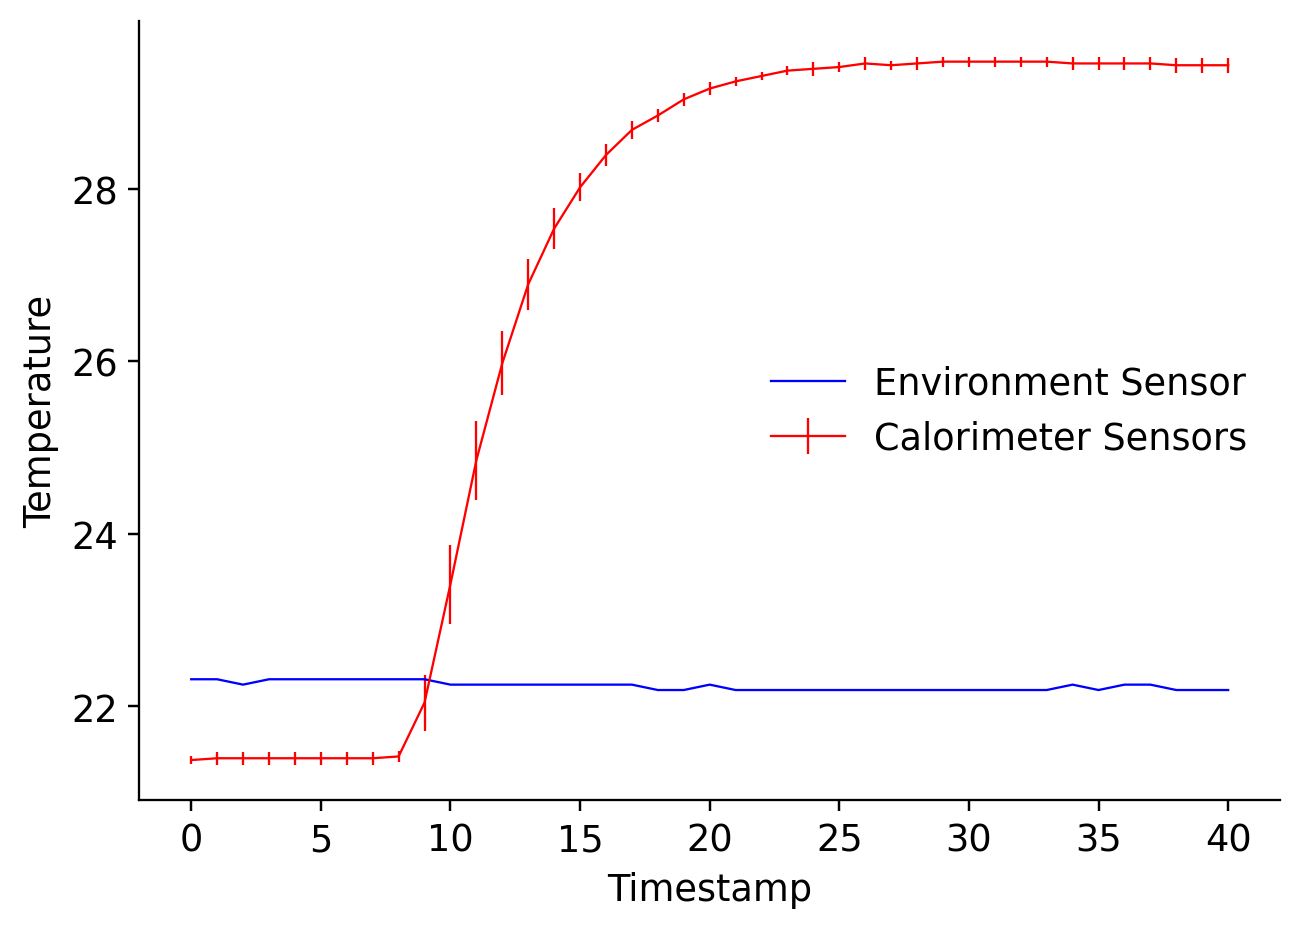

In [16]:
# TODO: Use the temperature and time data for plotting.
mean_values_prob1 = mean_std_calorimeter_prob1[0] # first dimension is mean
std_dev_values_prob1 = mean_std_calorimeter_prob1[1] # second dimension is standard deviation
# mean and standard deviation for the bath and environment sensors is just going to be one point in the graph
# so i will plot their temperature data instead.

# Plotting the mean values with error bars
plt.errorbar(range(len(mean_values_prob1)), mean_values_prob1, yerr=std_dev_values_prob1, fmt='r-', label='Calorimeter Sensors')
plt.plot(env_data_prob1,'b-',label='Environment Sensor')
# bath sensor can be also displayed
'''
plt.plot(bath_data_prob_1,'g-',label='bath Sensor')
'''
# Adding labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the water from the metadata of the experiment.
# Reading the metadata
with open(metadata_path_prob1, "r") as file:
    metadata = json.load(file)

# Extract the water mass value from the metadata
water_mass = metadata["calorimeter"]["medium"]["mass"]["value"]

# Print or use the water mass value as needed
print("Water Mass:", water_mass, "grams")
# DONE #

Water Mass: 400 grams


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_mix_prob1, temperature_start_water_prob1 = utility.get_start_end_temperature(mean_values_prob1)
print('Temperature at the start is:', temperature_start_water_prob1)
print( 'Temperature after mixing is:',temperature_mix_prob1)
# DONE #

Temperature at the start is: 21.39583333333333
Temperature after mixing is: 29.419642857142858


In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
mean_values_10_prob1 = mean_std_calorimeter_prob1[0][:10] # getting only first 10 values
# Calculate the mean of the first 10 values
temperature_start_sample_prob1 = np.mean(mean_values_10_prob1)

# Print the result
print("Mean of the First 10 Values is :",temperature_start_sample_prob1 )
# DONE #

Mean of the First 10 Values is : 21.460416666666664


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
 # TODO: Calulate specific heat capacity of the sample.
C = calorimeter_const  # calorimeter constant is in J/°C
T_M = temperature_start_sample_prob1  # temperature of the calorimeter in °C
T1 = temperature_start_water_prob1  # initial temperature in °C
T2 = temperature_mix_prob1  # final temperature in °C
mp = (water_mass/1000)  # mass of the water is in kg

# Calculation
cp = (C*(T_M-T1))/(mp*(T2-T_M))

# Print the result
print(f"Specific heat (cp): {cp} J/kg°C")
# DONE #

Specific heat (cp): 38.99805109130445 J/kg°C


#### (Vii) Ergebnis

In [21]:
sample_heat_capa_prob1= 38.99805109130445 #in J/kg°C

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
datafile_path_prob2 = 'data/Messing/Messing.h5'
group_path_prob2= '/RawData'
setup_file_path_prob2= "data/Messing/setup_PDC015.json"
metadata_path_prob2= "data/Messing/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
# DONE #

In [23]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, group_path_prob2)
# temperature data
temperature_data_prob2 = data_dict['temperature']
# timestamp data
timestamp_data_prob2 = data_dict['timestamp']
# names
sensor_names_prob2 = data_dict['name']

# getting data, based on assumption that the calorimeter sensors are the first 3
# evironment sensor is the 4 and last one is the bath sensor
# These assumptions will be tested in cell below.
calorimeter_data_prob2 = temperature_data_prob2[0:3, :]
env_data_prob2 = temperature_data_prob2[3, :]
bath_data_prob2 = temperature_data_prob2[4, :]

# doing same for the timestamp
calorimeter_timestamp_prob2 = timestamp_data_prob2[0:3, :]
env_timestamp_prob2 = timestamp_data_prob2[3, :]
bath_timestamp_prob2 = timestamp_data_prob2[4, :]

# Printing the values 
print("Calorimeter Data:")
print()
print(calorimeter_data_prob2)

print("\nEnvironment Data:")
print()
print(env_data_prob2)

print("\nBath Data:")
print()
print(bath_data_prob2)
# As you can see the data below seems very plausible
#DONE#

Calorimeter Data:

[[21.1875 21.1875 21.25   21.25   21.25   21.25   21.25   21.25   21.25
  21.625  22.9375 24.3125 25.4375 26.25   26.875  27.25   27.5625 27.75
  27.875  28.     28.     28.0625 28.125  28.125  28.125  28.125  28.125
  28.125  28.125  28.125 ]
 [21.0625 21.125  21.125  21.125  21.125  21.125  21.125  21.125  21.125
  21.625  23.     24.375  25.5    26.25   26.8125 27.1875 27.4375 27.6875
  27.75   27.875  27.9375 27.9375 27.9375 27.9375 28.     28.     28.
  28.     28.     28.    ]
 [21.0625 21.0625 21.0625 21.0625 21.0625 21.0625 21.0625 21.0625 21.125
  22.3125 23.875  25.1875 26.125  26.75   27.1875 27.5    27.6875 27.8125
  27.9375 27.9375 28.     28.     28.     28.     28.     28.     28.
  28.     28.     28.    ]]

Environment Data:

[22.25   22.1875 22.1875 22.1875 22.1875 22.1875 22.1875 22.25   22.25
 22.25   22.25   22.25   22.3125 22.25   22.3125 22.25   22.25   22.25
 22.3125 22.25   22.25   22.3125 22.25   22.3125 22.3125 22.3125 22.3125
 22.25   22.3

In [24]:
# TODO: In order to be able to process data from sensors with the same position.
# Confirming the assumptions made above
with open(setup_file_path_prob2, "r") as file:#reading the setup file
    setup_data = json.load(file)
#index lists for each sensor type
index_calorimeter = []
index_bath = []
index_env = []
# Starting value is 1
counter = 1
# Iterating through sensors and their types in the setup
for sensor_id, sensor_info in setup_data["setup"].items():
    if sensor_info["type"] == "sensor":
        if "calorimeter" in sensor_info["name"]:
            index_calorimeter.append(counter)# calorimeter indexing
        elif "bath" in sensor_info["name"]:
            index_bath.append(counter)# bath indexing
        elif "environment" in sensor_info["name"]:
            index_env.append(counter)#environment indexing
        counter += 1

# Printing results
print("Calorimeter Indexes:", index_calorimeter)
print("Environment Indexes:", index_env)
print("Bath Indexes:", index_bath)
# This confirms the data now i can start to process it
#DONE#

Calorimeter Indexes: [1, 2, 3]
Environment Indexes: [4]
Bath Indexes: [5]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
# TODO: Calculate the average value and standard deviation of sensors.
mean_std_calorimeter_prob2 = utility.cal_mean_and_standard_deviation(calorimeter_data_prob2)# mean for 3 calorimetry sensors
mean_std_environment_prob2 = utility.cal_mean_and_standard_deviation(env_data_prob2)# mean for environment sensor
mean_std_heater_prob2 = utility.cal_mean_and_standard_deviation(bath_data_prob2)# mean for bath sensor

# Printing the results
print("Mean and Standard Deviation for Calorimeter Sensors:")
print(mean_std_calorimeter_prob2)

print("\nMean and Standard Deviation for Environment Sensors:")
print(mean_std_environment_prob2)

print("\nMean and Standard Deviation for Bath Sensors:")
print(mean_std_heater_prob2)
#DONE#

Mean and Standard Deviation for Calorimeter Sensors:
[[21.10416667 21.125      21.14583333 21.14583333 21.14583333 21.14583333
  21.14583333 21.14583333 21.16666667 21.85416667 23.27083333 24.625
  25.6875     26.41666667 26.95833333 27.3125     27.5625     27.75
  27.85416667 27.9375     27.97916667 28.         28.02083333 28.02083333
  28.04166667 28.04166667 28.04166667 28.04166667 28.04166667 28.04166667]
 [ 0.05892557  0.05103104  0.0779512   0.0779512   0.0779512   0.0779512
   0.0779512   0.0779512   0.05892557  0.32409061  0.42797164  0.39856513
   0.31040968  0.23570226  0.16404183  0.13501543  0.10206207  0.05103104
   0.0779512   0.05103104  0.02946278  0.05103104  0.0779512   0.0779512
   0.05892557  0.05892557  0.05892557  0.05892557  0.05892557  0.05892557]]

Mean and Standard Deviation for Environment Sensors:
[[22.25833333]
 [ 0.04487637]]

Mean and Standard Deviation for Bath Sensors:
[[7.94583333e+01]
 [6.52186493e-02]]


#### (iii) Daten ploten

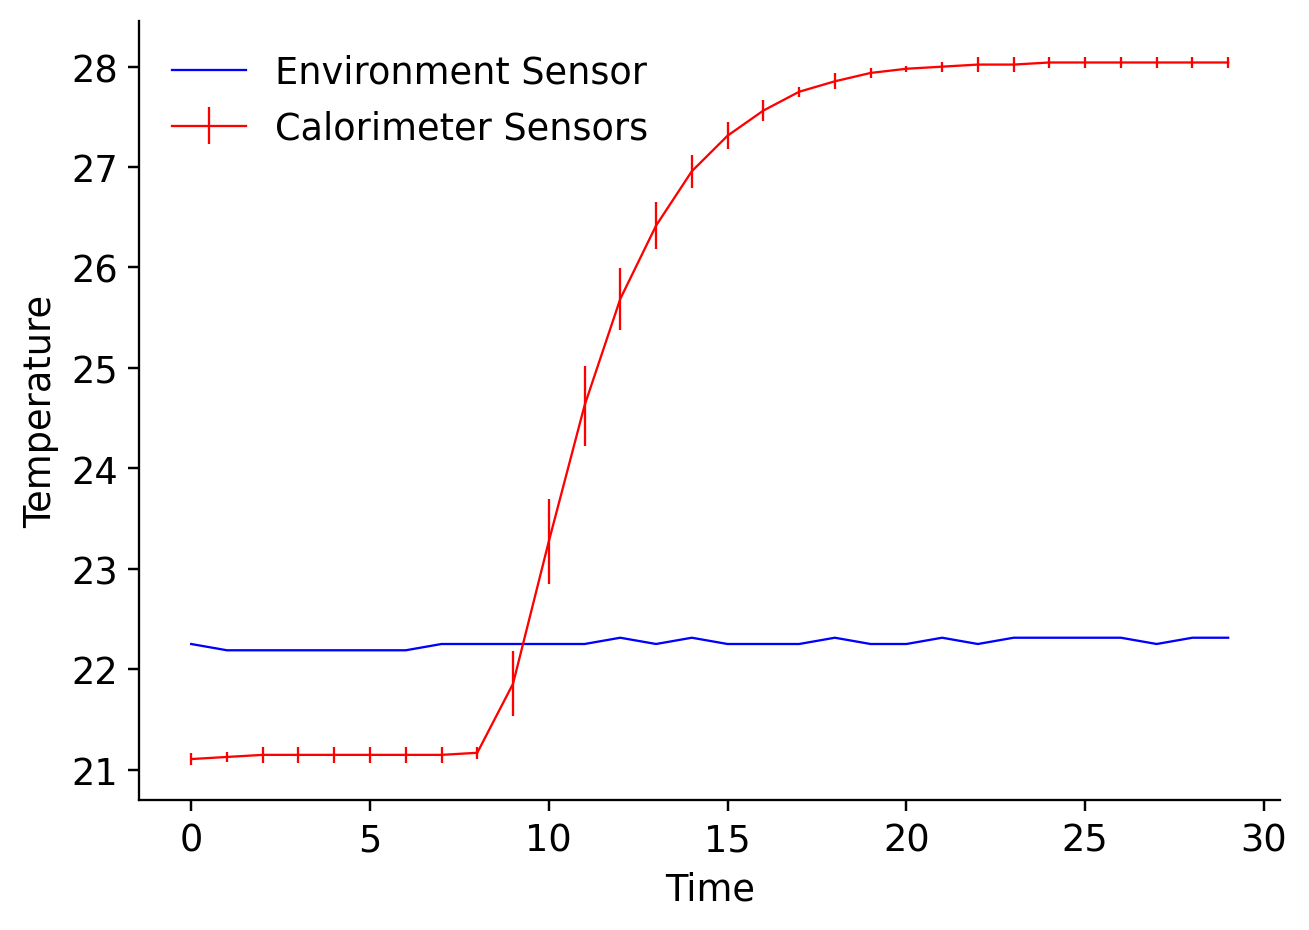

In [26]:
# TODO: Use the temperature and time data for plotting.
mean_values_prob2 = mean_std_calorimeter_prob2[0] # first dimension is mean
std_dev_values_prob2 = mean_std_calorimeter_prob2[1] # second dimension is standard deviation
# mean and standard deviation for the bath and environment sensors is just going to be one point in the graph
# so i will plot their temperature data instead.

# Plotting the mean values with error bars
plt.errorbar(range(len(mean_values_prob2)), mean_values_prob2, yerr=std_dev_values_prob2, fmt='r-', label='Calorimeter Sensors')
plt.plot(env_data_prob2,'b-',label='Environment Sensor')
# bath sensor can be also displayed
'''
plt.plot(bath_data_prob2,'g-',label='bath Sensor')
'''
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the water from the metadata of the experiment.
# Reading the metadata
with open(metadata_path_prob2, "r") as file:
    metadata = json.load(file)

# Extract the water mass value from the metadata
water_mass = metadata["calorimeter"]["medium"]["mass"]["value"]

# Print or use the water mass value as needed
print("Water Mass:", water_mass, "grams")
# DONE #

Water Mass: 400 grams


#### (v) Anfangs- und Endwert der Temperatur

In [28]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_mix_prob2, temperature_start_water_prob2 = utility.get_start_end_temperature(mean_values_prob2)
print('Temperature at the start is:', temperature_start_water_prob2)
print( 'Temperature after mixing is:',temperature_mix_prob2)
# DONE #

Temperature at the start is: 21.141203703703706
Temperature after mixing is: 27.985576923076927


In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
mean_values_10_prob2 = mean_std_calorimeter_prob2[0][:10] # getting only first 10 values
# Calculate the mean of the first 10 values
temperature_start_sample_prob2 = np.mean(mean_values_10_prob2)

# Print the result
print("Mean of the First 10 Values is :",temperature_start_sample_prob2 )
# DONE #

Mean of the First 10 Values is : 21.2125


#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
 # TODO: Calulate specific heat capacity of the sample.
C = calorimeter_const  # calorimeter constant is in J/°C
T_M = temperature_start_sample_prob2  # temperature of the calorimeter in °C
T1 = temperature_start_water_prob2  # initial temperature in °C
T2 = temperature_mix_prob2  # final temperature in °C
mp = (water_mass/1000)  # mass of the water is in kg

# Calculation
cp = (C*(T_M-T1))/(mp*(T2-T_M))

# Print the result
print(f"Specific heat (cp): {cp} J/kg°C")
# DONE #

Specific heat (cp): 50.59111557795051 J/kg°C


#### (Vii) Ergebnis

In [31]:
sample_heat_capa_2= 50.59111557795051 #in J/kg°C

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
datafile_path_prob3 = 'data/Kunststoff/Kunststoff.h5'
group_path_prob3= '/RawData'
setup_file_path_prob3= "data/Kunststoff/setup_PDC028.json"
metadata_path_prob3= "data/Kunststoff/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
# DONE #

In [33]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, group_path_prob3)
# temperature data
temperature_data_prob3 = data_dict['temperature']
# timestamp data
timestamp_data_prob3 = data_dict['timestamp']
# names
sensor_names_prob3 = data_dict['name']

# getting data, based on assumption that the calorimeter sensors are the first 3
# evironment sensor is the 4 and last one is the bath sensor
# These assumptions will be tested in cell below.
calorimeter_data_prob3 = temperature_data_prob3[0:3, :]
env_data_prob3 = temperature_data_prob3[3, :]
bath_data_prob3 = temperature_data_prob3[4, :]

# doing same for the timestamp
calorimeter_timestamp_prob3 = timestamp_data_prob3[0:3, :]
env_timestamp_prob3 = timestamp_data_prob3[3, :]
bath_timestamp_prob3 = timestamp_data_prob3[4, :]

# Printing the values 
print("Calorimeter Data:")
print()
print(calorimeter_data_prob3)

print("\nEnvironment Data:")
print()
print(env_data_prob3)

print("\nBath Data:")
print()
print(bath_data_prob3)
# As you can see the data below seems very plausible
#DONE#

Calorimeter Data:

[[19.9375 19.9375 19.9375 19.9375 19.9375 19.9375 19.9375 19.9375 20.
  20.0625 20.375  20.75   21.125  21.4375 21.75   21.9375 22.1875 22.375
  22.5625 22.75   22.8125 23.     23.125  23.25   23.375  23.4375 23.5
  23.625  23.6875 23.75   23.8125]
 [19.75   19.75   19.8125 19.8125 19.8125 19.8125 19.8125 19.8125 19.8125
  19.9375 20.3125 20.6875 21.0625 21.3125 21.5625 21.875  22.125  22.3125
  22.5    22.625  22.75   22.875  23.0625 23.125  23.25   23.3125 23.375
  23.5    23.5625 23.625  23.6875]
 [19.75   19.75   19.75   19.75   19.75   19.75   19.75   19.75   19.8125
  20.0625 20.5    20.875  21.25   21.5    21.8125 22.     22.25   22.4375
  22.5625 22.75   22.875  22.875  23.0625 23.1875 23.3125 23.375  23.4375
  23.5    23.625  23.6875 23.6875]]

Environment Data:

[22.5    22.5    22.5    22.5    22.5    22.5    22.5    22.5625 22.5
 22.5625 22.5    22.5    22.5    22.5625 22.5625 22.5625 22.5    22.5625
 22.5625 22.5    22.5625 22.5    22.5625 22.5625 22.562

In [34]:
# TODO: In order to be able to process data from sensors with the same position.
# Confirming the assumptions made above
with open(setup_file_path_prob3, "r") as file:#reading the setup file
    setup_data = json.load(file)
#index lists for each sensor type
index_calorimeter = []
index_bath = []
index_env = []
# Starting value is 1
counter = 1
# Iterating through sensors and their types in the setup
for sensor_id, sensor_info in setup_data["setup"].items():
    if sensor_info["type"] == "sensor":
        if "calorimeter" in sensor_info["name"]:
            index_calorimeter.append(counter)# calorimeter indexing
        elif "bath" in sensor_info["name"]:
            index_bath.append(counter)# bath indexing
        elif "environment" in sensor_info["name"]:
            index_env.append(counter)#environment indexing
        counter += 1

# Printing results
print("Calorimeter Indexes:", index_calorimeter)
print("Environment Indexes:", index_env)
print("Bath Indexes:", index_bath)
# This confirms the data now i can start to process it
#DONE#

Calorimeter Indexes: [1, 2, 3]
Environment Indexes: [4]
Bath Indexes: [5]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
# TODO: Calculate the average value and standard deviation of sensors.
mean_std_calorimeter_prob3 = utility.cal_mean_and_standard_deviation(calorimeter_data_prob3)# mean for 3 calorimetry sensors
mean_std_environment_prob3 = utility.cal_mean_and_standard_deviation(env_data_prob3)# mean for environment sensor
mean_std_heater_prob3 = utility.cal_mean_and_standard_deviation(bath_data_prob3)# mean for bath sensor

# Printing the results
print("Mean and Standard Deviation for Calorimeter Sensors:")
print(mean_std_calorimeter_prob3)

print("\nMean and Standard Deviation for Environment Sensors:")
print(mean_std_environment_prob3)

print("\nMean and Standard Deviation for Bath Sensors:")
print(mean_std_heater_prob3)
#DONE#

Mean and Standard Deviation for Calorimeter Sensors:
[[19.8125     19.8125     19.83333333 19.83333333 19.83333333 19.83333333
  19.83333333 19.83333333 19.875      20.02083333 20.39583333 20.77083333
  21.14583333 21.41666667 21.70833333 21.9375     22.1875     22.375
  22.54166667 22.70833333 22.8125     22.91666667 23.08333333 23.1875
  23.3125     23.375      23.4375     23.54166667 23.625      23.6875
  23.72916667]
 [ 0.08838835  0.08838835  0.0779512   0.0779512   0.0779512   0.0779512
   0.0779512   0.0779512   0.08838835  0.05892557  0.0779512   0.0779512
   0.0779512   0.0779512   0.10622957  0.05103104  0.05103104  0.05103104
   0.02946278  0.05892557  0.05103104  0.05892557  0.02946278  0.05103104
   0.05103104  0.05103104  0.05103104  0.05892557  0.05103104  0.05103104
   0.05892557]]

Mean and Standard Deviation for Environment Sensors:
[[22.53225806]
 [ 0.03123374]]

Mean and Standard Deviation for Bath Sensors:
[[7.95383065e+01]
 [7.04203597e-02]]


#### (iii) Daten ploten

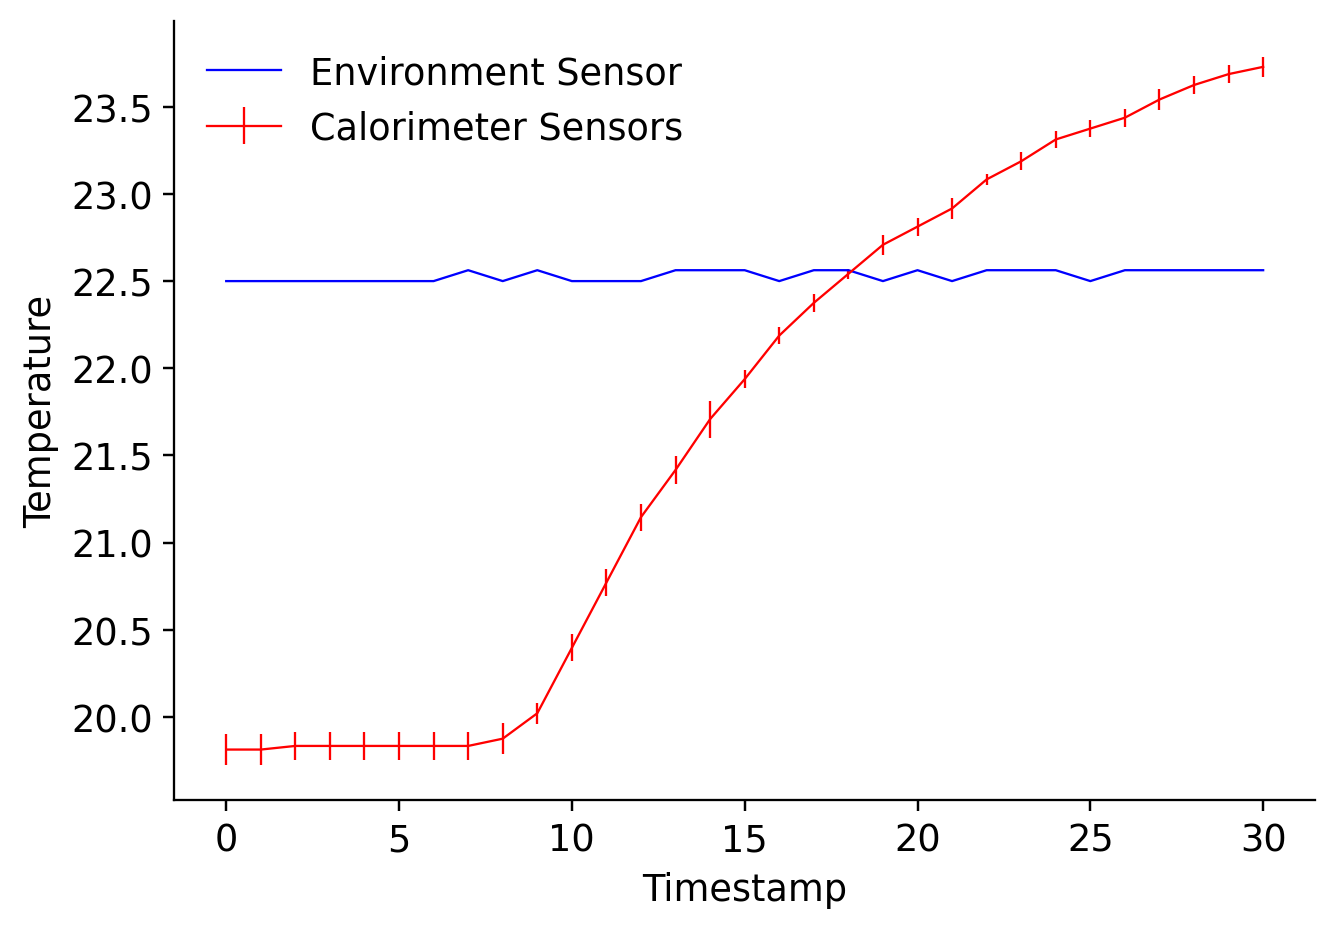

In [36]:
# TODO: Use the temperature and time data for plotting.
mean_values_prob3 = mean_std_calorimeter_prob3[0] # first dimension is mean
std_dev_values_prob3 = mean_std_calorimeter_prob3[1] # second dimension is standard deviation
# mean and standard deviation for the bath and environment sensors is just going to be one point in the graph
# so i will plot their temperature data instead.

# Plotting the mean values with error bars
plt.errorbar(range(len(mean_values_prob3)), mean_values_prob3, yerr=std_dev_values_prob3, fmt='r-', label='Calorimeter Sensors')
plt.plot(env_data_prob3,'b-',label='Environment Sensor')
# bath sensor can be also displayed
'''
plt.plot(bath_data_prob3,'g-',label='bath Sensor')
'''
# Adding labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the water from the metadata of the experiment.
# Reading the metadata
with open(metadata_path_prob3, "r") as file:
    metadata = json.load(file)

# Extract the water mass value from the metadata
water_mass = metadata["calorimeter"]["medium"]["mass"]["value"]

# Print or use the water mass value as needed
print("Water Mass:", water_mass, "grams")
# DONE #

Water Mass: 400 grams


#### (v) Anfangs- und Endwert der Temperatur

In [38]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_mix_prob3, temperature_start_water_prob3 = utility.get_start_end_temperature(mean_values_prob3)
print('Temperature at the start is:', temperature_start_water_prob3)
print( 'Temperature after mixing is:',temperature_mix_prob3)
# DONE #

Temperature at the start is: 19.833333333333332
Temperature after mixing is: 23.645833333333336


In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
mean_values_10_prob3 = mean_std_calorimeter_prob3[0][:10] # getting only first 10 values
# Calculate the mean of the first 10 values
temperature_start_sample_prob3 = np.mean(mean_values_10_prob3)

# Print the result
print("Mean of the First 10 Values is :",temperature_start_sample_prob3 )
# DONE #

Mean of the First 10 Values is : 19.852083333333333


#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
 # TODO: Calulate specific heat capacity of the sample.
C = calorimeter_const  # calorimeter constant is in J/°C
T_M = temperature_start_sample_prob3  # temperature of the calorimeter in °C
T1 = temperature_start_water_prob3  # initial temperature in °C
T2 = temperature_mix_prob3 # final temperature in °C
mp = (water_mass/1000)  # mass of the water is in kg

# Calculation
cp = (C*(T_M-T1))/(mp*(T2-T_M))

# Print the result
print(f"Specific heat (cp): {cp} J/kg°C")
# DONE #

Specific heat (cp): 23.75340414825729 J/kg°C


#### (Vii) Ergebnis

In [41]:
sample_heat_capa_3=23.75340414825729 #in J/kg°C

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Messing hat die höchste spezifische Wärmekapazität, gefolgt von Edelstahl und Kunststoff

Mir war nicht klar, ob Edelstahl oder Messing die höhere spezifische Wärmekapazität haben wird, aber es war von Anfang an eindeutig, dass Kunststoff, in unserem Fall Nylon, die niedrigste spezifische Wärmekapazität haben wird.

Wenn man warmes Wasser aus dem Sous-Vide-Garer mit der Probe in das Kalorimeter transportiert, werden die Berechnungen der spezifischen Wärmekapazität verfälscht, da nicht nur die Probe das Wasser im Kalorimeter erwärmt, sondern auch das mit ihr transportierte Wasser. Um dies zu vermeiden, haben wir unsere Proben so schnell und so gut wie möglich getrocknet. Eine weitere Fehlerquelle könnten die Sensoren sein, die nicht 100 % genau sind. Eine weitere Fehlerquelle ist die Zeit, die für den Transport der Probe vom heißen Bad zum Kalorimeter benötigt wird, da die Proben sich in der Zwischenzeit abkühlen.
Insgesamt gaben es viele Daten und es musste darauf geachtet werden, die Variablen während der Ausarbeitung klar zu definieren, um später nicht durcheinander zu kommen. Auch die Visualisierung der H5-Dateien war eine große Hilfe, um die Ergebnisse besser zu verstehen. Ich persönlich habe die H5-Dateien in Visual Studio Code geöffnet und dann die Daten verglichen, was mir dabei geholfen hat, viele Fehler zu vermeiden.